# Restaurant Food Cost

In [1]:
# First , I will import all the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# I have import the Given dataset
df = pd.read_excel('Data_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# Data Preprocessing :

In [3]:
# I will check the information of  the data :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [4]:
# I will check is there any null value present
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [5]:
# I will delete all those rows where null values are there
df = df.dropna(axis = 0)
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [6]:
# I will delete the 'RESTURANT_ID' which is not  important
new_df = df.drop(columns = 'RESTAURANT_ID')
new_df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


# Data Cleaning :

In [ ]:
# I will  clean the TITLE column first : 

In [7]:
# I will check how many unique resturents are there
new_df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'QUICK BITES,FOOD COURT', 'SWEET SHOP', 'PUB,CASUAL DINING',
       'MESS', 'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP',
       'KIOSK', 'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'DHABA',
       'CAFÉ,DESSERT PARLOR', 'CASUAL DINING,CAFÉ',
       'QUICK BITES,DESSERT PARLOR', 'PUB,MICROBREWERY', 'LOUNGE,BAR',
      

In [8]:
len(new_df['TITLE'].unique())

111

In [9]:
# I will replace all the ',' with ' ' and will take only the first name
new_df['TITLE'] = new_df['TITLE'].str.split(' ').str.slice(0).str.join(' ').str.replace(',','')

In [10]:
new_df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,CASUAL DININGBAR,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,CASUAL DININGBAR,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [11]:
len(new_df['TITLE'].unique())

111

In [ ]:
# Similarly , I will modify the 'CITY' column :

In [12]:
new_df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Secunderabad', 'India',
       'Madhuranagar', 'Chennai Teynampet', 'Faridabad', 'Chembur.',
       'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Bengalore', 'Near Reliance Fresh', 'Kilpauk',
       'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
       'Tamil Nadu', 'Kakkanad', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powai Plaza)', 'Dombivali East',
       'Kandivali', 'Dewan Rama Road', 'Gurugram', 'Sector 51 Noida',
 

In [13]:
# I will remove all the numeric values from city
new_df = new_df[~new_df['CITY'].str.isnumeric()] 

In [14]:
new_df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Secunderabad', 'India',
       'Madhuranagar', 'Chennai Teynampet', 'Faridabad', 'Chembur.',
       'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Bengalore', 'Near Reliance Fresh', 'Kilpauk',
       'Bengaluru', 'Kothaguda', 'Goregaon West', 'Banglore',
       'Tamil Nadu', 'Kakkanad', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powai Plaza)', 'Dombivali East',
       'Kandivali', 'Dewan Rama Road', 'Gurugram', 'Sector 51 Noida',
       'Bes

In [15]:
new_df['LOCALITY'].unique()

array(['Dombivali East', 'Ramapuram', 'Saligramam', ..., 'OMR Padur',
       'Near Perambur', 'Near Malviya Nagar'], dtype=object)

In [ ]:
# I will  modify the 'VOTES' column :

In [16]:
# I will delete the word 'votes' from 'VOTES' column :
new_df['VOTES'] = new_df['VOTES'].str.split(' ').str.get(0)

C:\Users\admin\AppData\Local\Temp\ipykernel_7852\241921022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['VOTES'] = new_df['VOTES'].str.split(' ').str.get(0)


In [17]:
new_df

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,CASUAL DININGBAR,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300
...,...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546,500
12686,CASUAL DININGBAR,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32,400


In [18]:
# I will convert 'VOTES' to integer
new_df['VOTES'] = new_df['VOTES'].astype(int)
# I will convert 'RATING' to float
new_df['RATING'] = new_df['RATING'].astype(float)

C:\Users\admin\AppData\Local\Temp\ipykernel_7852\2416977061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['VOTES'] = new_df['VOTES'].astype(int)
C:\Users\admin\AppData\Local\Temp\ipykernel_7852\2416977061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['RATING'] = new_df['RATING'].astype(float)


In [19]:
new_df.isnull().sum()

TITLE       0
CUISINES    0
TIME        0
CITY        0
LOCALITY    0
RATING      0
VOTES       0
COST        0
dtype: int64

# Data Visualization :

# I want to see which hotals has the highest and lowest price :

In [20]:
Hotal_info = new_df.groupby('TITLE')['COST'].mean()
Hotal_info

TITLE
BAKERY                      353.921488
BAKERYBEVERAGE SHOP         200.000000
BAKERYCAFÉ                  658.333333
BAKERYCONFECTIONERY         400.000000
BAKERYDESSERT PARLOR        380.392157
                               ...    
SWEET SHOPBEVERAGE SHOP     200.000000
SWEET SHOPCASUAL DINING     400.000000
SWEET SHOPCONFECTIONERY     500.000000
SWEET SHOPDESSERT PARLOR    300.000000
SWEET SHOPQUICK BITES       298.913043
Name: COST, Length: 111, dtype: float64

In [21]:
sorted_cost = Hotal_info.sort_values(ascending=False)

top_10_Hotals = sorted_cost.head(10)
bottom_10_Hotals = sorted_cost.tail(10)

print("Hotals with highest price:")
print(top_10_Hotals)
print("Hotals with lowest price:")
print(bottom_10_Hotals)

Hotals with highest price:
TITLE
FINE DINING                  2965.196078
FINE DININGBAR               2825.000000
COCKTAIL BARCASUAL DINING    2750.000000
CLUB                         2610.526316
FINE DININGLOUNGE            2550.000000
BARMICROBREWERY              2500.000000
COCKTAIL BAR                 2250.000000
CLUBBAR                      2150.000000
BARFINE DINING               2116.666667
LOUNGEFINE DINING            2000.000000
Name: COST, dtype: float64
Hotals with lowest price:
TITLE
CONFECTIONERYQUICK BITES    200.000000
BAKERYBEVERAGE SHOP         200.000000
DESSERT PARLORKIOSK         200.000000
DESSERT PARLORSWEET SHOP    195.454545
QUICK BITESKIOSK            183.333333
QUICK BITESFOOD TRUCK       150.000000
DESSERT PARLORPAAN SHOP     150.000000
KIOSKQUICK BITES            150.000000
PAAN SHOP                   116.666667
SWEET SHOPBAKERY            100.000000
Name: COST, dtype: float64


<Axes: xlabel='TITLE'>

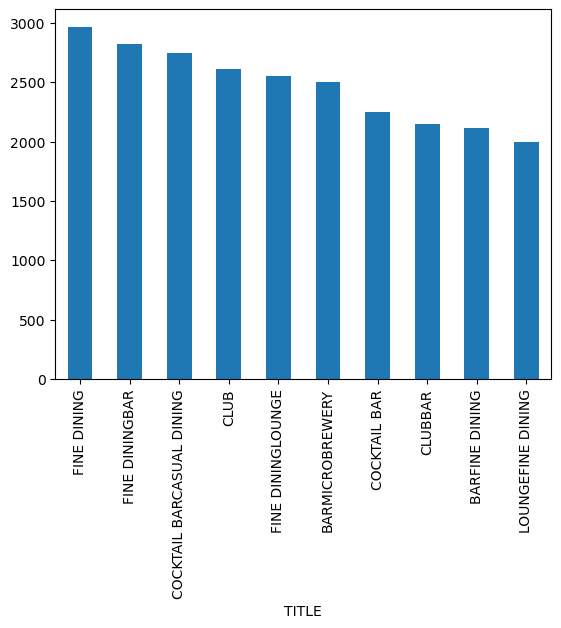

In [22]:
sorted_cost.head(10).plot(kind = 'bar')

<Axes: xlabel='TITLE'>

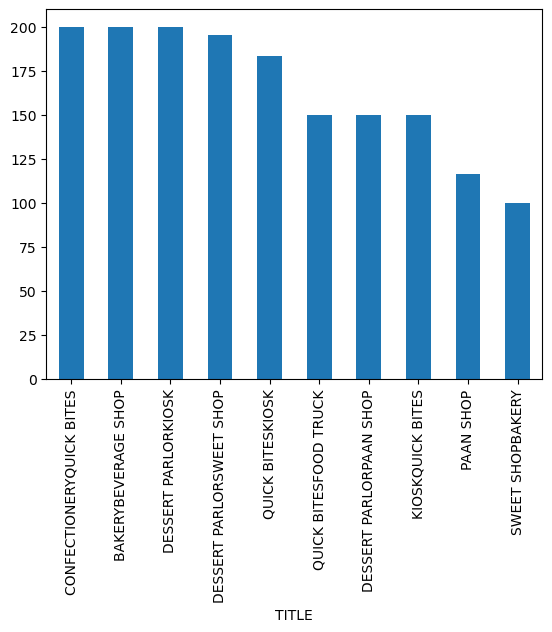

In [23]:
sorted_cost.tail(10).plot(kind = 'bar')

# I want to see which CUISINES has the highest and lowest price :

In [24]:
CUISINES_info = new_df.groupby('CUISINES')['COST'].mean()
CUISINES_info

CUISINES
African, Burger, Desserts, Beverages, Fast Food, Salad                 900.00
American                                                               956.25
American, Arabian, Fast Food, Lebanese                                 400.00
American, Asian, Burger, Chinese, Desserts, Panini, Italian, Momos     600.00
American, Asian, Cafe, Continental, Italian, Burger, Pizza            1000.00
                                                                       ...   
Turkish, Rolls, Lebanese, Arabian                                      500.00
Vietnamese                                                            2100.00
Vietnamese, Salad                                                     1100.00
Vietnamese, Thai, Burmese, Japanese                                   1000.00
Wraps, Fast Food                                                       250.00
Name: COST, Length: 3913, dtype: float64

In [25]:
sorted_cost_cuisine = CUISINES_info.sort_values(ascending=False)

top_10_CUISINES = sorted_cost_cuisine.head(10)
bottom_10_CUISINES = sorted_cost_cuisine.tail(10)

print("CUISINES with highest price:")
print(top_10_CUISINES)
print("CUISINES with lowest price:")
print(bottom_10_CUISINES)

CUISINES with highest price:
CUISINES
Italian, Mediterranean, Thai                            7000.0
North Indian, Continental, Pizza, Italian               6000.0
Japanese, Continental, Chinese                          5500.0
Japanese, Italian, North Indian, Chinese                5500.0
Chinese, Seafood, Beverages                             5000.0
Continental, North Indian, Chinese, Bar Food            5000.0
North Indian, European, Continental, Salad              5000.0
European, Continental, Asian                            5000.0
Italian, Thai, North Indian, Japanese, Mediterranean    5000.0
European, Italian, North Indian, Asian                  5000.0
Name: COST, dtype: float64
CUISINES with lowest price:
CUISINES
Beverages, Coffee                                                 100.0
Beverages, Desserts, Ice Cream, Juices, Healthy Food, Sandwich    100.0
Coffee, Fast Food                                                 100.0
Mithai, Street Food, Desserts                       

<Axes: xlabel='CUISINES'>

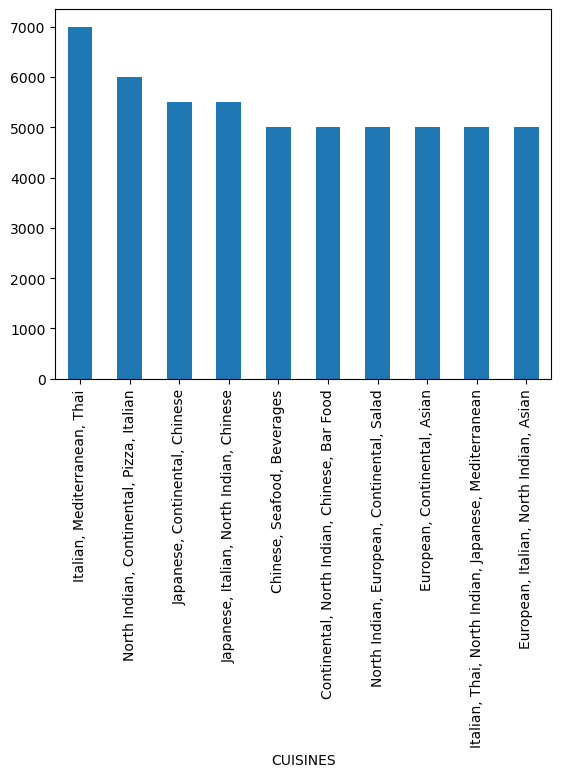

In [26]:
sorted_cost_cuisine.head(10).plot(kind = 'bar')

<Axes: xlabel='CUISINES'>

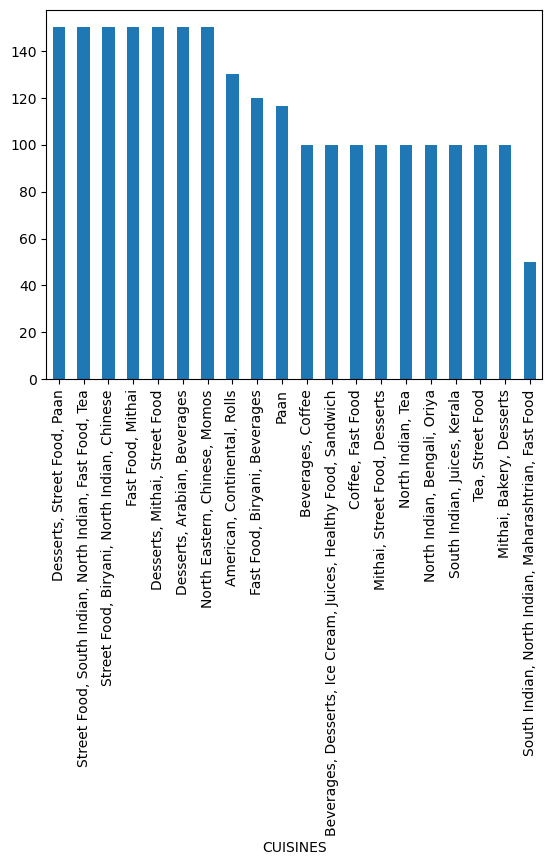

In [27]:
sorted_cost_cuisine.tail(20).plot(kind = 'bar')

# I want to see how time is related to the price :

In [28]:
Time_info = new_df.groupby('TIME')['COST'].mean()
sorted_cost_time = Time_info.sort_values(ascending=False)

top_10_Time = sorted_cost_time.head(20)
bottom_10_Time = sorted_cost_time.tail(20)

print("Time and highest price:")
print(top_10_Time)
print("Time and lowest price:")
print(bottom_10_Time)

Time and highest price:
TIME
Closed (Mon),7:30pm – 12midnight (Tue-Sat),12:30pm...    6500.0
12:30pm – 3pm, 7pm – 6am (Mon-Sun)                       6000.0
5:30am – 1am (Mon-Sun)                                   5500.0
Closed (Mon),7pm – 11:30pm (Tue-Fri),12:30pm –...        5500.0
12:30pm – 2:45pm, 7pm – 11:30pm...                       5500.0
7:30pm – 11:30pm (Mon-Sat),12:30pm – 3:30pm...           5200.0
7pm – 11:45pm (Mon-Sat),12:30pm – 2:45pm, 7pm...         5000.0
12noon – 2:30pm, 7pm – 10:30pm (Mon-Sun)                 5000.0
12noon – 2:45pm, 7pm – 11:45pm (Mon-Sun)                 5000.0
Closed (Mon),7pm – 1am (Tue),10pm – 1am (Wed-Sun)        5000.0
6:30pm – 11:30pm (Mon-Sat),12:30pm – 3:30pm...           5000.0
7am – 11am, 12noon – 3pm, 7pm – 11pm (Mon-Sun)           5000.0
Closed (Mon, Tue, Thu, Sun), 7pm – 3am (Wed, Fri...      5000.0
7:30pm – 11:30pm (Mon-Fri),12:30pm – 2:45pm...           5000.0
Closed (Mon-Tue),10pm – 4am (Wed-Sun)                    5000.0
12:30pm – 2

# I want to see which CITY has the highest and lowest price 

In [29]:
City_info = new_df.groupby('CITY')['COST'].mean()
City_info

CITY
10th avenue                                                       300.0
1st Stage                                                         200.0
1st Tavarekere                                                    400.0
3rd Street                                                       1200.0
5th Main Teachers Colony Koramangala Block 1 Bangalore 560034     200.0
                                                                  ...  
navi mumbai                                                      1600.0
opp gurudwara Shakurpur                                           100.0
opp mukteshwar ashram powai                                       800.0
p.o Kochi                                                         350.0
ward X11                                                          100.0
Name: COST, Length: 335, dtype: float64

In [30]:
sorted_cost_City = City_info.sort_values(ascending=False)

top_10_City = sorted_cost_City.head(10)
bottom_10_City = sorted_cost_City.tail(10)

print("City with highest price:")
print(top_10_City)
print("City with lowest price:")
print(bottom_10_City)

City with highest price:
CITY
Banglaore                  3000.000000
Chennai Thousand Lights    2500.000000
Kerala 682304              2200.000000
Chennai Teynampet          2166.666667
Malleshwaram Bangalore     2000.000000
Ulsoo                      2000.000000
Chennai Mahabalipuram      1850.000000
Gurgoan                    1800.000000
Khar (west)                1700.000000
Grant Road West            1600.000000
Name: COST, dtype: float64
City with lowest price:
CITY
New Delhi 110075           150.0
Narayanguda                150.0
HBR Layout                 150.0
IOB Bank Kamala Nagar      150.0
West Maredpally            150.0
opp gurudwara Shakurpur    100.0
Kochi Palarivattom         100.0
Dewan Rama Road            100.0
Tripunithura               100.0
ward X11                   100.0
Name: COST, dtype: float64


<Axes: xlabel='CITY'>

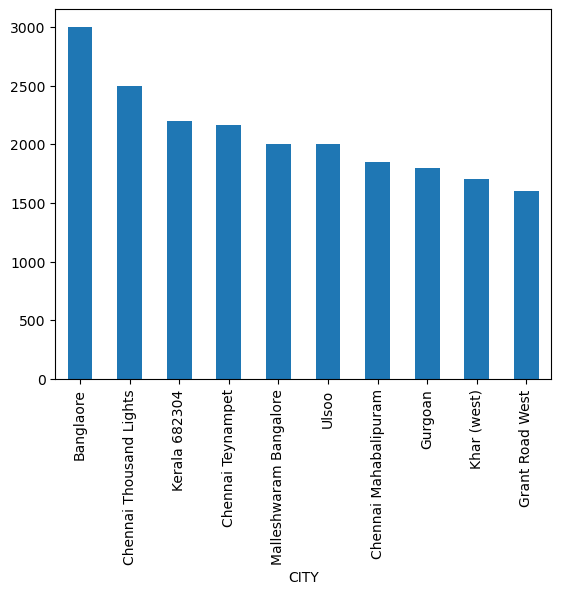

In [31]:
sorted_cost_City.head(10).plot(kind = 'bar')

<Axes: xlabel='CITY'>

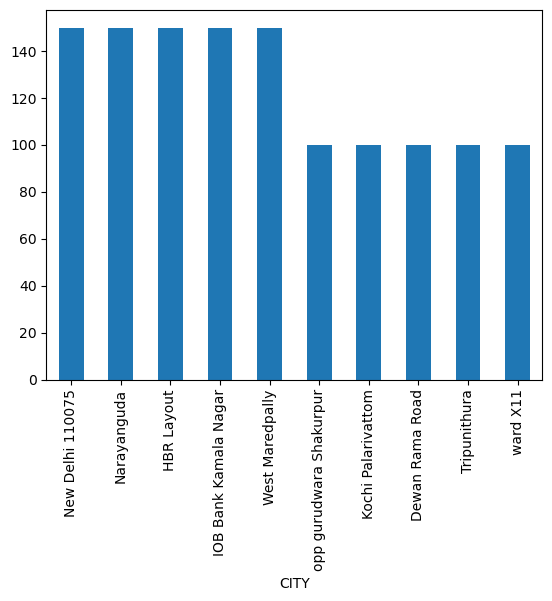

In [32]:
sorted_cost_City.tail(10).plot(kind = 'bar')

# I want to see which LOCALITY has the highest and lowest price

In [33]:
Locality_info = new_df.groupby('LOCALITY')['COST'].mean()
sorted_cost_Locality = Locality_info.sort_values(ascending=False)

top_10_Locality = sorted_cost_Locality.head(10)
bottom_10_Locality = sorted_cost_Locality.tail(10)

print("Locality with highest price:")
print(top_10_Locality)
print("Locality with lowest price:")
print(bottom_10_Locality)

Locality with highest price:
LOCALITY
Dr. Zakir Hussain Marg         5000.000000
Bandra Reclamation Dock        5000.000000
Mansingh Road                  5000.000000
Bhikaji Cama Place             4500.000000
Aurangzeb Road                 4500.000000
Mumbai Bandra Kurla Complex    3800.000000
Sankey Road                    3500.000000
Lodhi Road                     3333.333333
Opposite Inorbit Mall          3000.000000
Mahalaxmi                      2837.500000
Name: COST, dtype: float64
Locality with lowest price:
LOCALITY
Near Rohini                                        100.0
Near Jeevan Jyoti Apartment                        100.0
Near Basavanagudi                                  100.0
hsr layout                                         100.0
Near Pravasi Industrial Goregaon East              100.0
Sarjapura Main Road Kaikondrahali Sarjapur Road    100.0
F 5/10 Mandir Marg Krishna Nagar                   100.0
North Fort Gate                                    100.0
West K.K. Na

<Axes: xlabel='LOCALITY'>

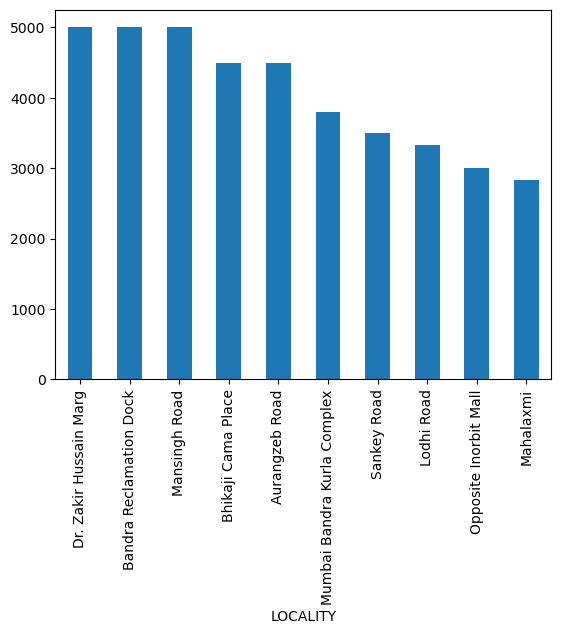

In [34]:
sorted_cost_Locality.head(10).plot(kind = 'bar')

<Axes: xlabel='LOCALITY'>

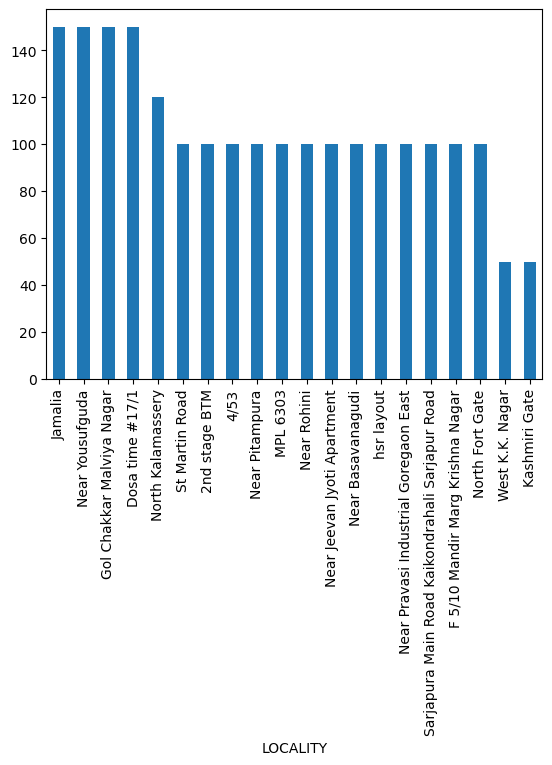

In [35]:
sorted_cost_Locality.tail(20).plot(kind = 'bar')

# I will search top 500 rows with highest Cost and will try to find out the reason of high cost :

In [36]:
top_500 = new_df.sort_values(by='COST', ascending=False).head(500)
top_500

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1475,FINE DINING,"Continental, North Indian",2pm – 11pm (Mon-Sun),Bangalore,Nagawara,3.9,126,14000
3211,FINE DINING,"Japanese, Sushi","12:30pm – 2:45pm, 7pm – 11:45pm (Mon-Sun)",Mumbai,Colaba,4.4,592,10000
1916,FINE DINING,Hyderabadi,"12:30pm – 3pm, 7:30pm – 11pm (Mon-Sun)",Hyderabad,Falaknuma,4.5,1019,8000
7883,FINE DINING,"Italian, Mediterranean, Thai",7am – 11pm (Mon-Sun),Hyderabad,Falaknuma,4.5,304,7000
2689,FINE DINING,Continental,"Closed (Mon),7:30pm – 12midnight (Tue-Sat),12:...",Mumbai,Mahalaxmi,4.3,340,6500
...,...,...,...,...,...,...,...,...
5094,FINE DINING,"Hyderabadi, Italian, European",24 Hours (Mon-Sun),Hyderabad,Begumpet,4.0,471,2000
12655,CASUAL DININGPUB,"Mediterranean, European, Mughlai, Finger Food","4pm – 1am (Mon-Sat),12noon – 1am (Sun)",Mumbai,Lower Parel,4.2,2132,2000
46,FINE DINING,"European, South Indian, American, North Indian...",24 Hours (Mon-Sun),Hyderabad,Hitech City,4.0,443,2000
3634,BARCASUAL DINING,"Continental, Mediterranean, Modern Indian, Mex...",12:30pm – 1:30am (Mon-Sun),Mumbai,Bandra East,4.8,1295,2000


In [37]:
def Checking(df):
    print('Number of each hotal :')
    Title = df['TITLE'].value_counts()
    print(Title)
    print()
    print('Number of each cuisine :')
    cuisines = df['CUISINES'].value_counts()
    print(cuisines)
    print()
    print('Time :')
    time = df['TIME'].value_counts()
    print(time)
    print()
    print('Number of each City :')
    Cities = df['CITY'].value_counts()
    print(Cities)
    print()
    print('Number of each locality :')
    Locality = df['LOCALITY'].value_counts()
    print(Locality)

In [38]:
Checking(df = top_500)

Number of each hotal :
FINE DINING                  252
CASUAL DINING                 54
CASUAL DININGBAR              31
FINE DININGBAR                28
LOUNGE                        27
CLUB                          12
BAR                            9
BARCASUAL DINING               9
BARLOUNGE                      8
PUB                            8
FINE DININGLOUNGE              7
CAFÉ                           6
BARFINE DINING                 5
LOUNGECASUAL DINING            5
LOUNGEBAR                      4
PUBMICROBREWERY                4
BARPUB                         3
PUBCASUAL DINING               3
CASUAL DININGPUB               3
MICROBREWERYCASUAL DINING      3
LOUNGEMICROBREWERY             2
PUBBAR                         2
COCKTAIL BAR                   2
MICROBREWERYBAR                1
LOUNGEPUB                      1
LOUNGEFINE DINING              1
CASUAL DININGLOUNGE            1
BARMICROBREWERY                1
MICROBREWERYPUB                1
MICROBREWERY        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'FINE DINING'),
  Text(1, 0, 'CLUB'),
  Text(2, 0, 'LOUNGE'),
  Text(3, 0, 'FINE DININGBAR'),
  Text(4, 0, 'BAR'),
  Text(5, 0, 'COCKTAIL BARCASUAL DINING'),
  Text(6, 0, 'CASUAL DINING'),
  Text(7, 0, 'CAFÉ'),
  Text(8, 0, 'FINE DININGLOUNGE'),
  Text(9, 0, 'BARLOUNGE'),
  Text(10, 0, 'PUBMICROBREWERY'),
  Text(11, 0, 'CLUBBAR'),
  Text(12, 0, 'PUB'),
  Text(13, 0, 'CASUAL DININGBAR'),
  Text(14, 0, 'LOUNGEBAR'),
  Text(15, 0, 'LOUNGECASUAL DINING'),
  Text(16, 0, 'BARPUB'),
  Text(17, 0, 'CASUAL DININGCAFÉ'),
  Text(18, 0, 'BARMICROBREWERY'),
  Text(19, 0, 'PUBBAR'),
  Text(20, 0, 'COCKTAIL BAR'),
  Text(21, 0, 'BARFINE DINING'),
  Text(22, 0, 'PUBCASUAL DINING'),
  Text(23, 0, 'PUBLOUNGE'),
  Text(24, 0, 'BARCASUAL DINING'),
  Text(25, 0, 'LOUNGECLUB'),
  Text(26, 0, 'MICROBREWERY'),
  Text(27, 0, 'MICR

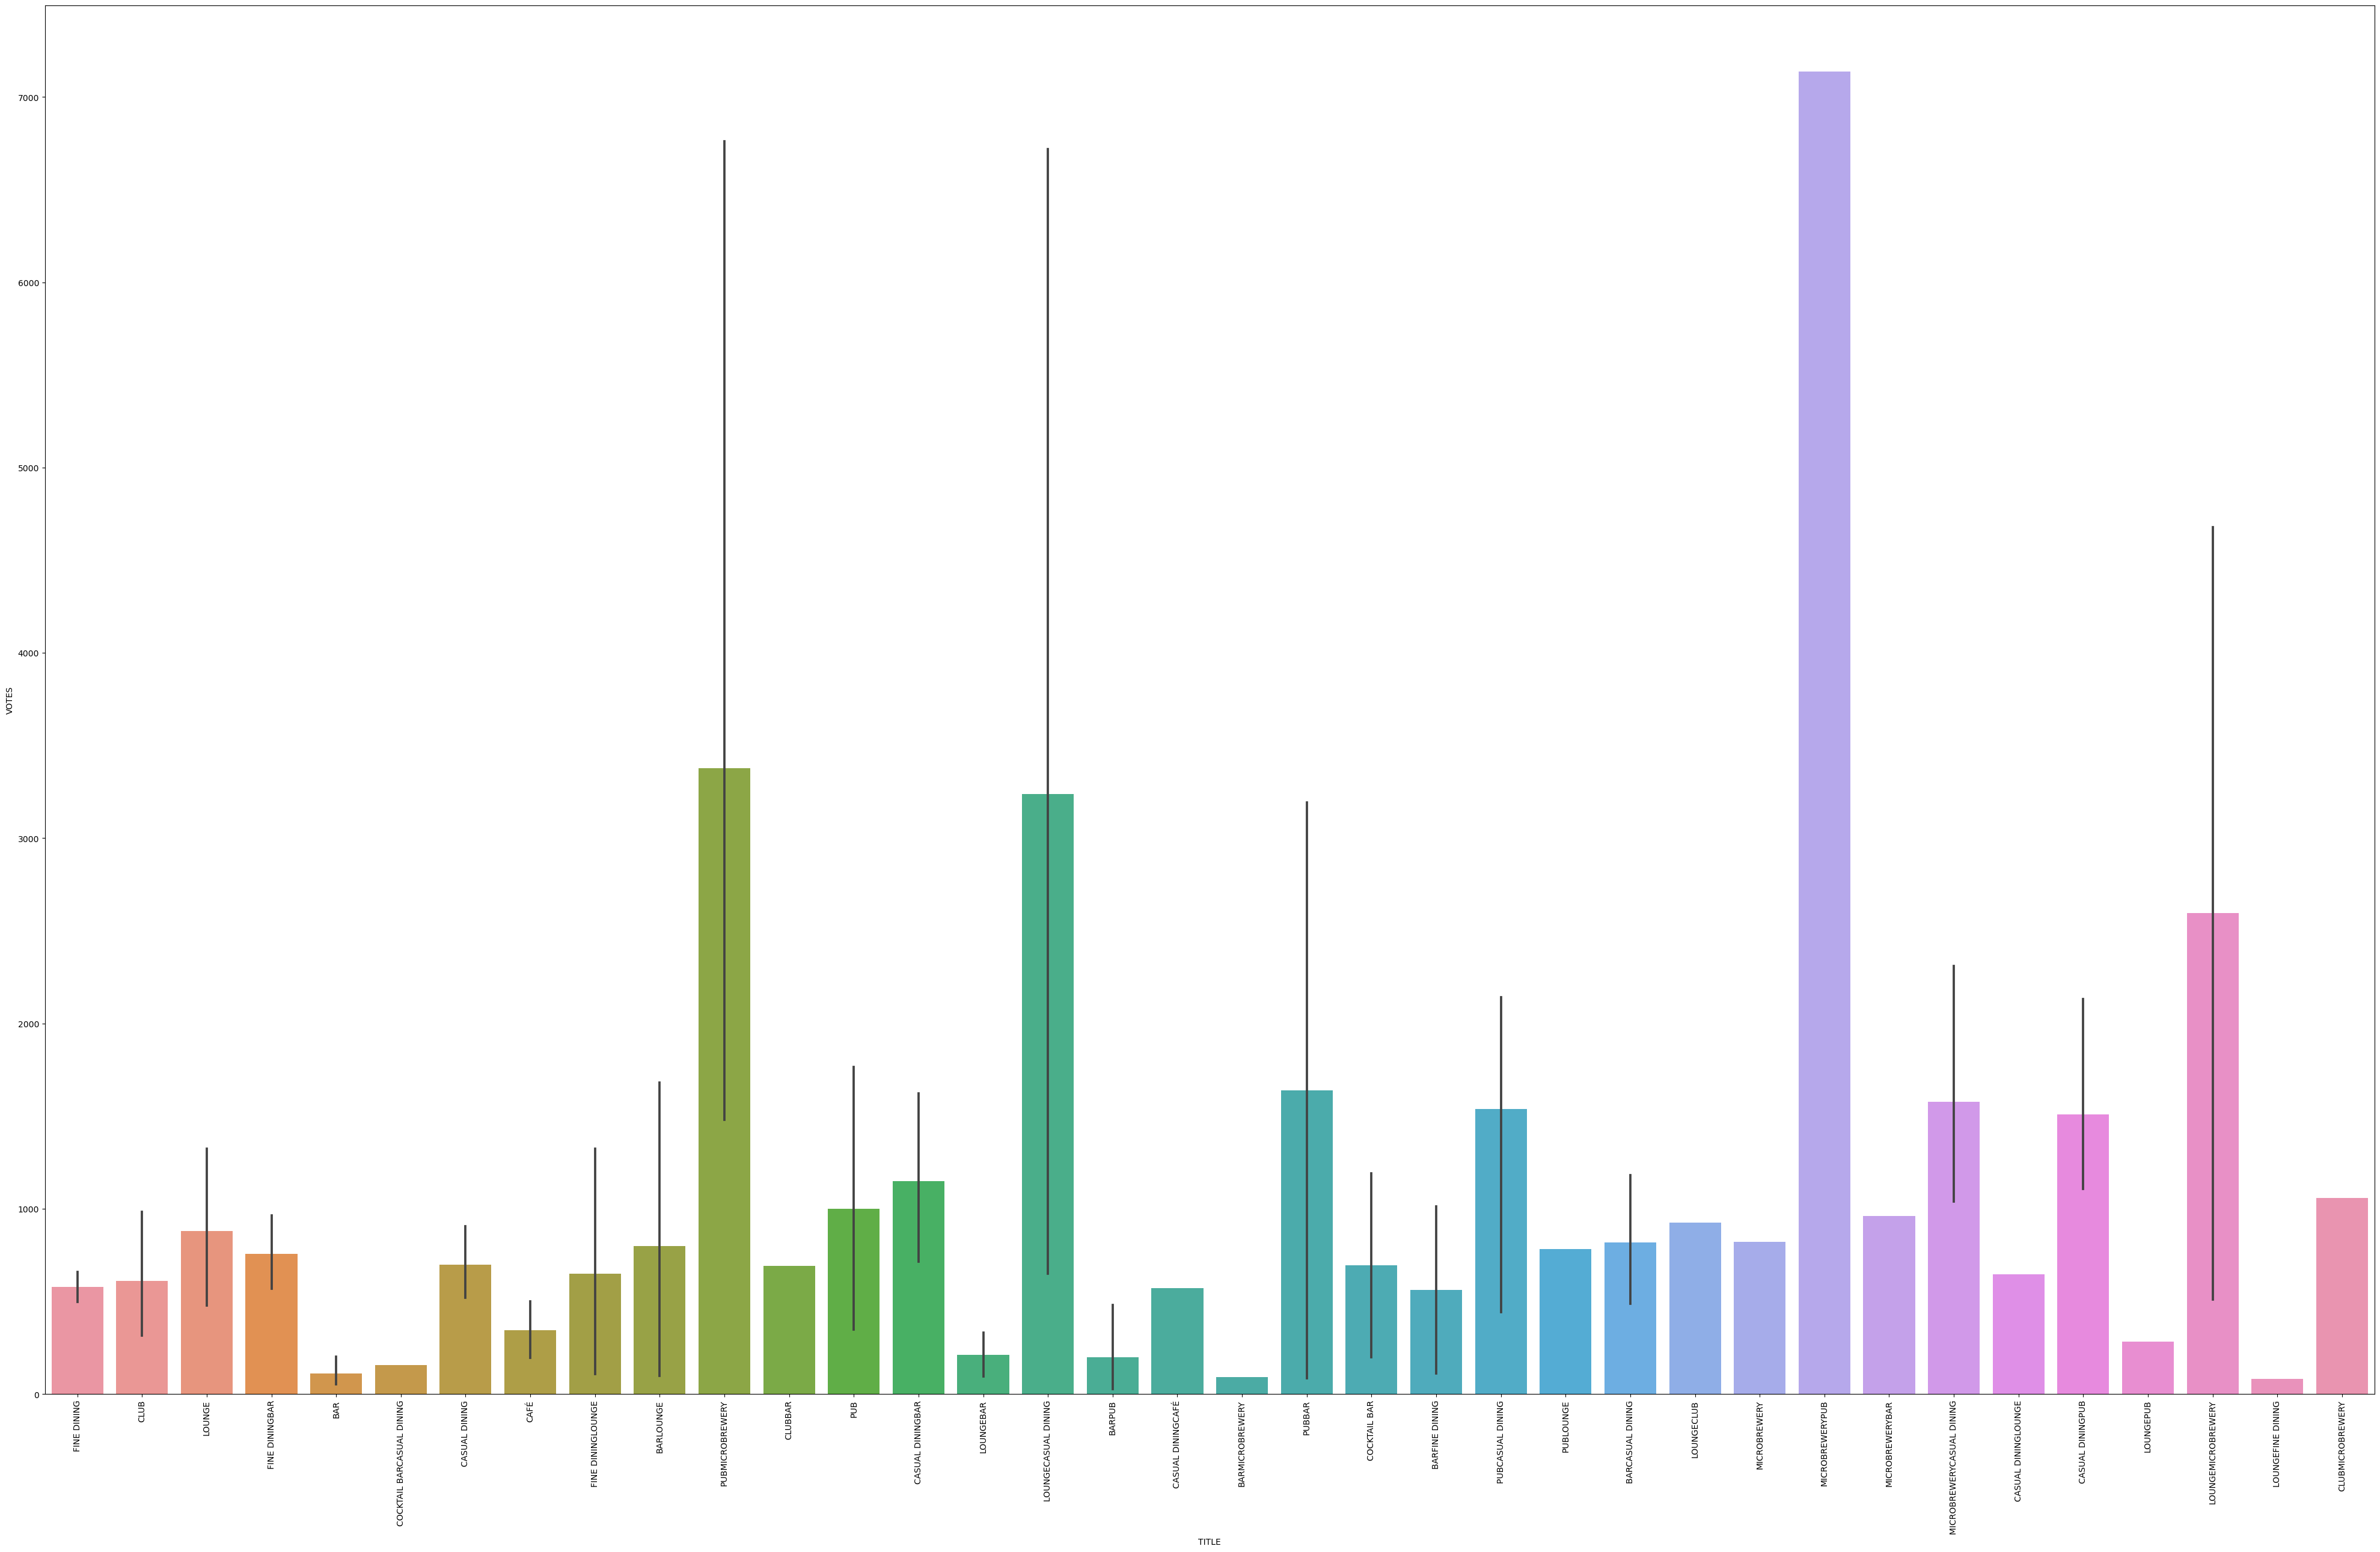

In [39]:
plt.rc("font", size=30)
plt.figure(figsize=(50 , 30))
sns.barplot(data = top_500 , x = 'TITLE' , y = 'VOTES' )
plt.xticks(rotation=90)
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, 'FINE DINING'),
  Text(1, 0, 'CLUB'),
  Text(2, 0, 'LOUNGE'),
  Text(3, 0, 'FINE DININGBAR'),
  Text(4, 0, 'BAR'),
  Text(5, 0, 'COCKTAIL BARCASUAL DINING'),
  Text(6, 0, 'CASUAL DINING'),
  Text(7, 0, 'CAFÉ'),
  Text(8, 0, 'FINE DININGLOUNGE'),
  Text(9, 0, 'BARLOUNGE'),
  Text(10, 0, 'PUBMICROBREWERY'),
  Text(11, 0, 'CLUBBAR'),
  Text(12, 0, 'PUB'),
  Text(13, 0, 'CASUAL DININGBAR'),
  Text(14, 0, 'LOUNGEBAR'),
  Text(15, 0, 'LOUNGECASUAL DINING'),
  Text(16, 0, 'BARPUB'),
  Text(17, 0, 'CASUAL DININGCAFÉ'),
  Text(18, 0, 'BARMICROBREWERY'),
  Text(19, 0, 'PUBBAR'),
  Text(20, 0, 'COCKTAIL BAR'),
  Text(21, 0, 'BARFINE DINING'),
  Text(22, 0, 'PUBCASUAL DINING'),
  Text(23, 0, 'PUBLOUNGE'),
  Text(24, 0, 'BARCASUAL DINING'),
  Text(25, 0, 'LOUNGECLUB'),
  Text(26, 0, 'MICROBREWERY'),
  Text(27, 0, 'MICR

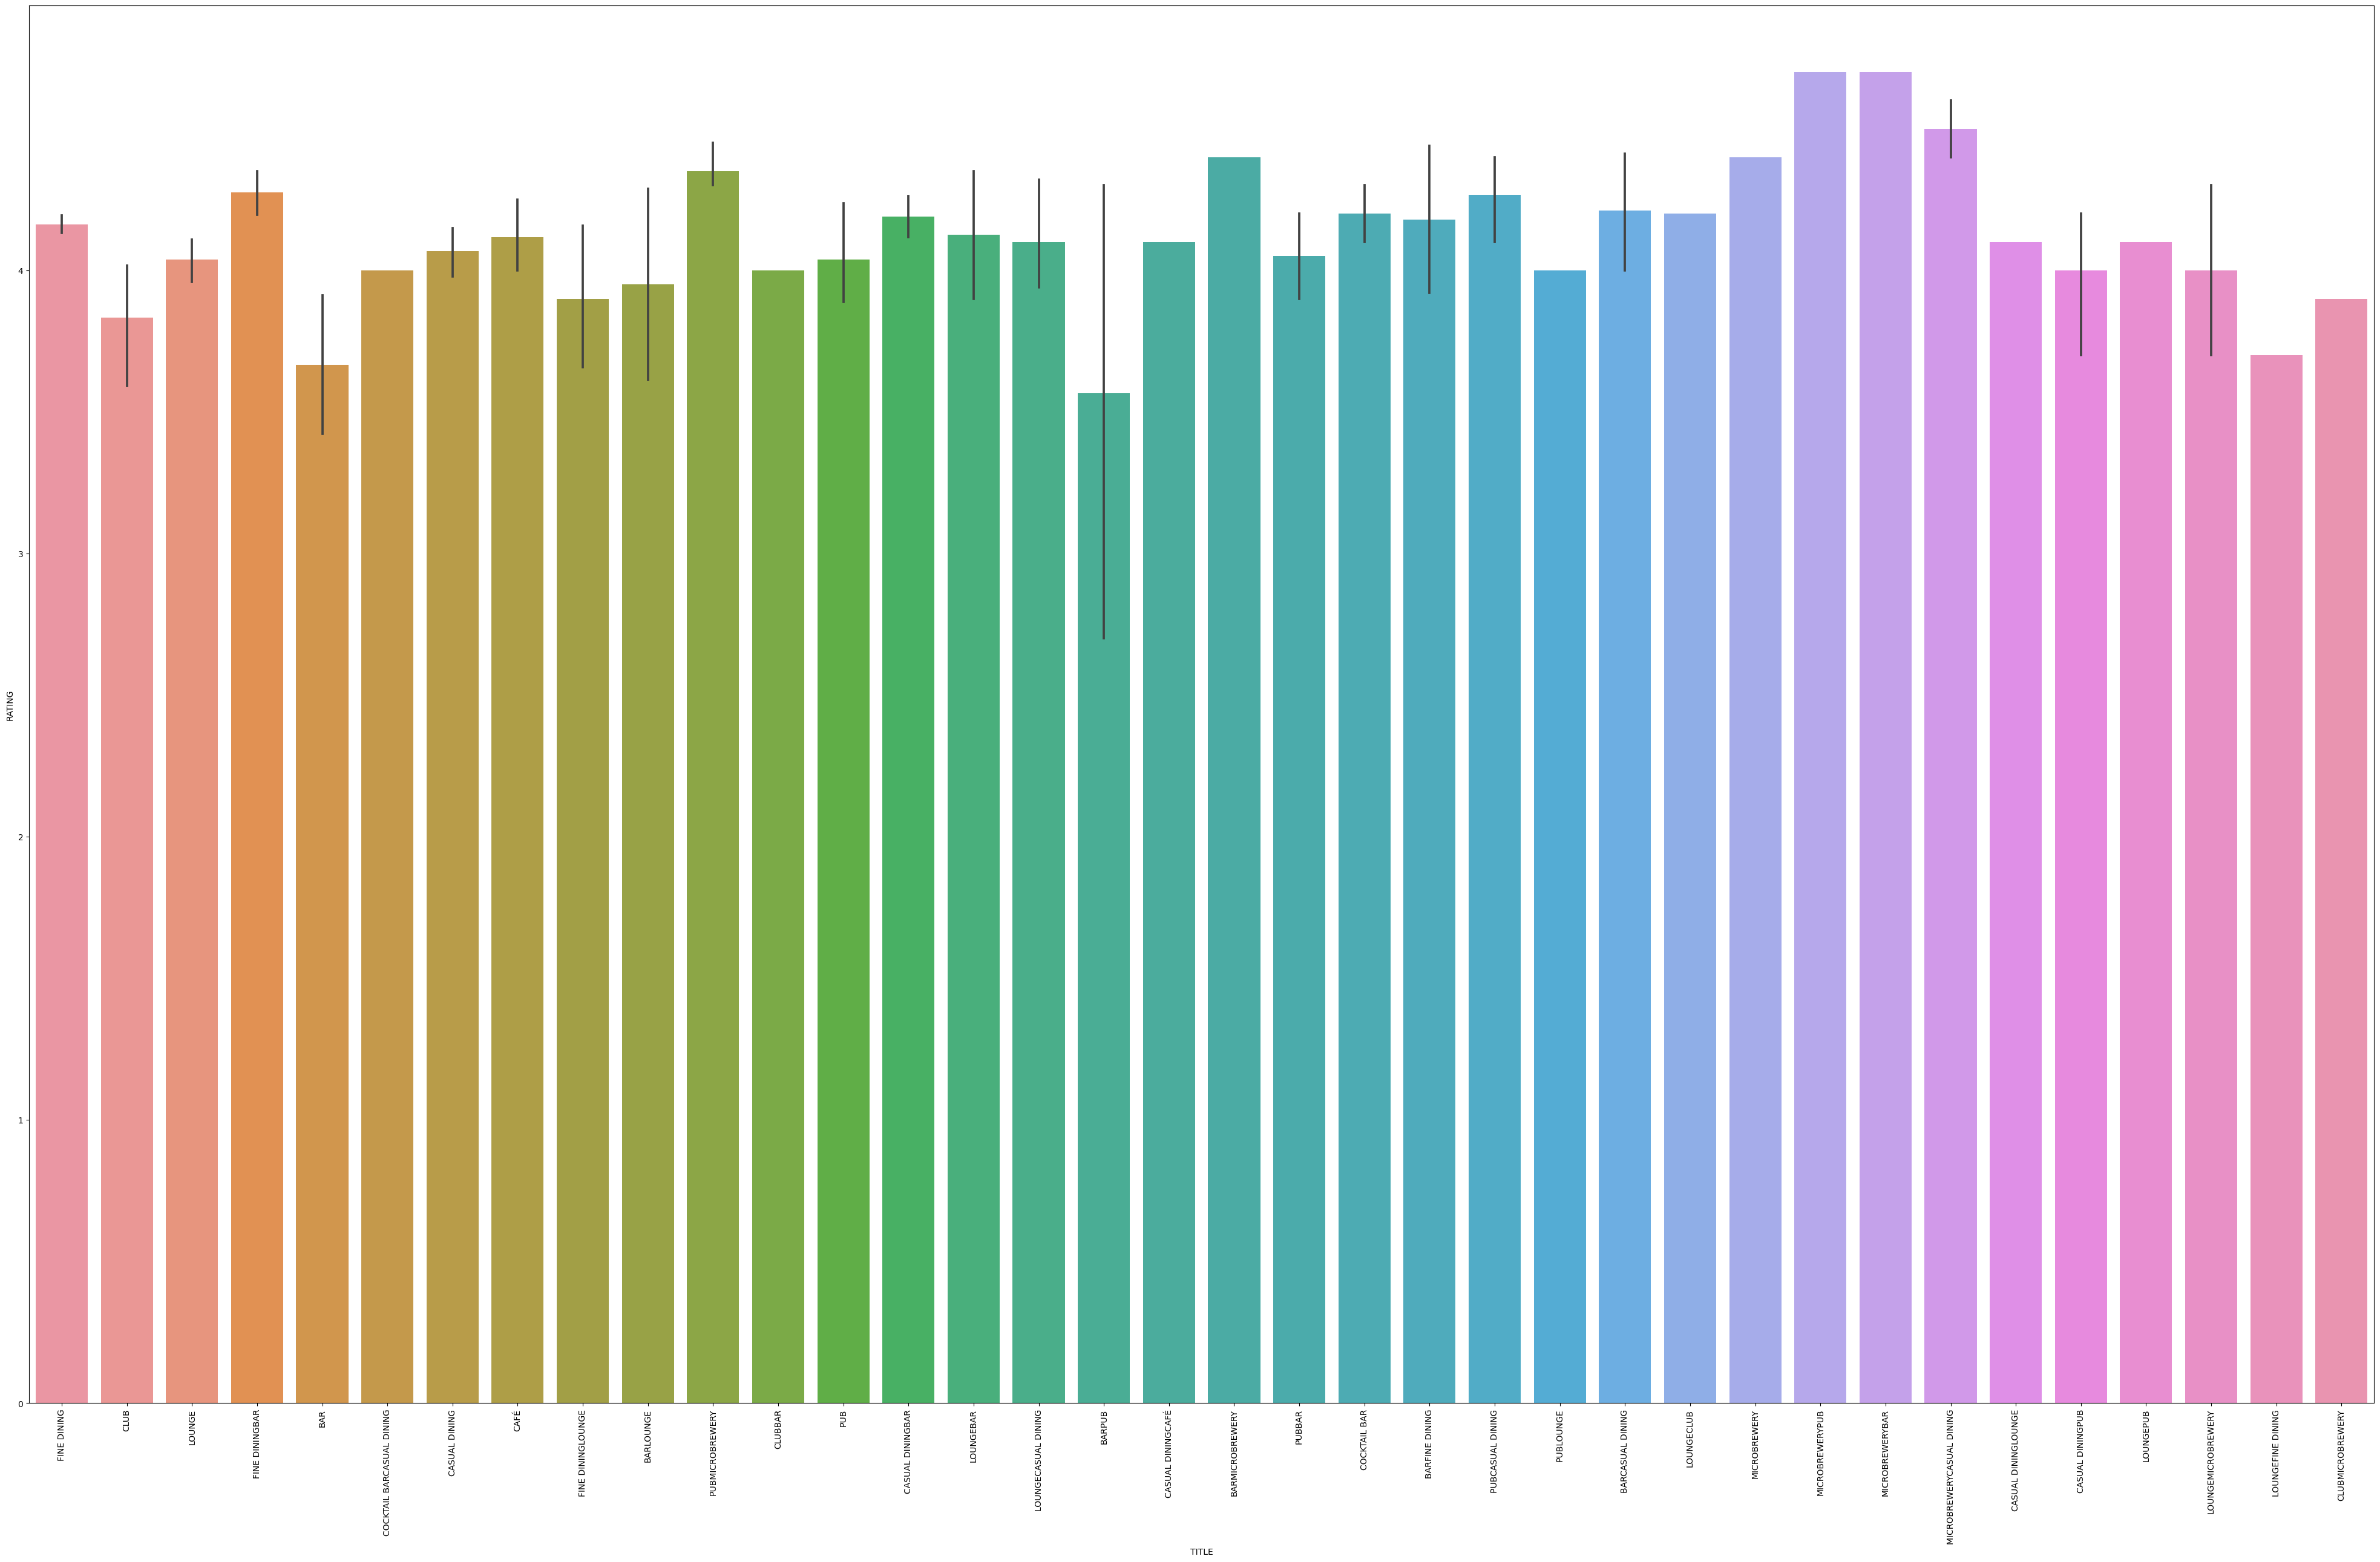

In [40]:
plt.rc("font", size=30)
plt.figure(figsize=(50 , 30))
sns.barplot(data = top_500 , x = 'TITLE' , y = 'RATING' )
plt.xticks(rotation=90)
plt.xticks()

In [41]:
# So , Analysing the above dataset of top 500 rows with highest cost , 
# I would say that the COST is mostly depend on the Brand of the Resturant and the Cuisines

# I will search  500 rows with lowest Cost and will try to find out the reason of high cost :

In [42]:
bottom_500 = new_df.sort_values(by='COST', ascending=False).tail(500)
bottom_500

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
1575,CASUAL DINING,South Indian,6am – 10pm (Mon-Sun),Chennai,Aminijikarai,3.8,34,150
6574,None,"South Indian, North Indian",6:30am – 10pm (Mon-Sun),Chennai,Besant Nagar,3.5,53,150
12376,QUICK BITES,"Fast Food, Beverages, Ice Cream, Juices, Sandwich",8am – 10pm (Mon-Sun),Bangalore,Sarjapur Road,3.7,28,150
6588,QUICK BITES,"Street Food, North Indian",10am – 10pm (Mon-Sun),New Delhi,Vikaspuri,3.4,139,150
10510,QUICK BITES,"Chinese, Momos",2pm – 10:30pm (Mon-Sun),New Delhi,Shahdara,4.0,590,150
...,...,...,...,...,...,...,...,...
3551,QUICK BITES,Street Food,6am – 11pm (Mon-Sun),Secunderabad,S D Road,4.2,111,50
1422,QUICK BITES,South Indian,11am – 11pm (Mon-Sun),Chennai,West K.K. Nagar,3.8,112,50
9578,None,Street Food,11am – 3pm (Mon-Sun),New Delhi,Kashmiri Gate,4.3,441,50
1281,None,"South Indian, North Indian, Maharashtrian, Fas...",5am – 10pm (Mon-Sun),Mumbai,Girgaum,3.3,7,50


In [43]:
Checking(df = bottom_500)

Number of each hotal :
QUICK BITES                    270
None                            57
DESSERT PARLOR                  47
BEVERAGE SHOP                   29
SWEET SHOP                      14
KIOSK                           12
BAKERY                          11
CASUAL DINING                    9
MESS                             6
SWEET SHOPQUICK BITES            5
BAKERYQUICK BITES                4
BAKERYDESSERT PARLOR             4
DESSERT PARLORSWEET SHOP         3
PAAN SHOP                        3
BEVERAGE SHOPDESSERT PARLOR      3
CAFÉ                             2
FOOD TRUCK                       2
QUICK BITESSWEET SHOP            2
DESSERT PARLORBEVERAGE SHOP      2
CAFÉDESSERT PARLOR               1
CAFÉQUICK BITES                  1
QUICK BITESBEVERAGE SHOP         1
SWEET SHOPBAKERY                 1
DHABA                            1
SWEET SHOPDESSERT PARLOR         1
DESSERT PARLORPAAN SHOP          1
KIOSKQUICK BITES                 1
QUICK BITESBAKERY               

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'CASUAL DINING'),
  Text(1, 0, 'None'),
  Text(2, 0, 'QUICK BITES'),
  Text(3, 0, 'SWEET SHOPQUICK BITES'),
  Text(4, 0, 'DESSERT PARLOR'),
  Text(5, 0, 'QUICK BITESSWEET SHOP'),
  Text(6, 0, 'DESSERT PARLORBEVERAGE SHOP'),
  Text(7, 0, 'CAFÉ'),
  Text(8, 0, 'BEVERAGE SHOP'),
  Text(9, 0, 'DESSERT PARLORFOOD COURT'),
  Text(10, 0, 'BAKERYQUICK BITES'),
  Text(11, 0, 'KIOSK'),
  Text(12, 0, 'DESSERT PARLORPAAN SHOP'),
  Text(13, 0, 'BAKERY'),
  Text(14, 0, 'FOOD TRUCK'),
  Text(15, 0, 'QUICK BITESBAKERY'),
  Text(16, 0, 'CAFÉDESSERT PARLOR'),
  Text(17, 0, 'SWEET SHOP'),
  Text(18, 0, 'BAKERYDESSERT PARLOR'),
  Text(19, 0, 'MESS'),
  Text(20, 0, 'QUICK BITESFOOD TRUCK'),
  Text(21, 0, 'DESSERT PARLORSWEET SHOP'),
  Text(22, 0, 'QUICK BITESDESSERT PARLOR'),
  Text(23, 0, 'CAFÉBAKERY'),
  Text(24, 0, 'FOOD COURT'),
  Text(25

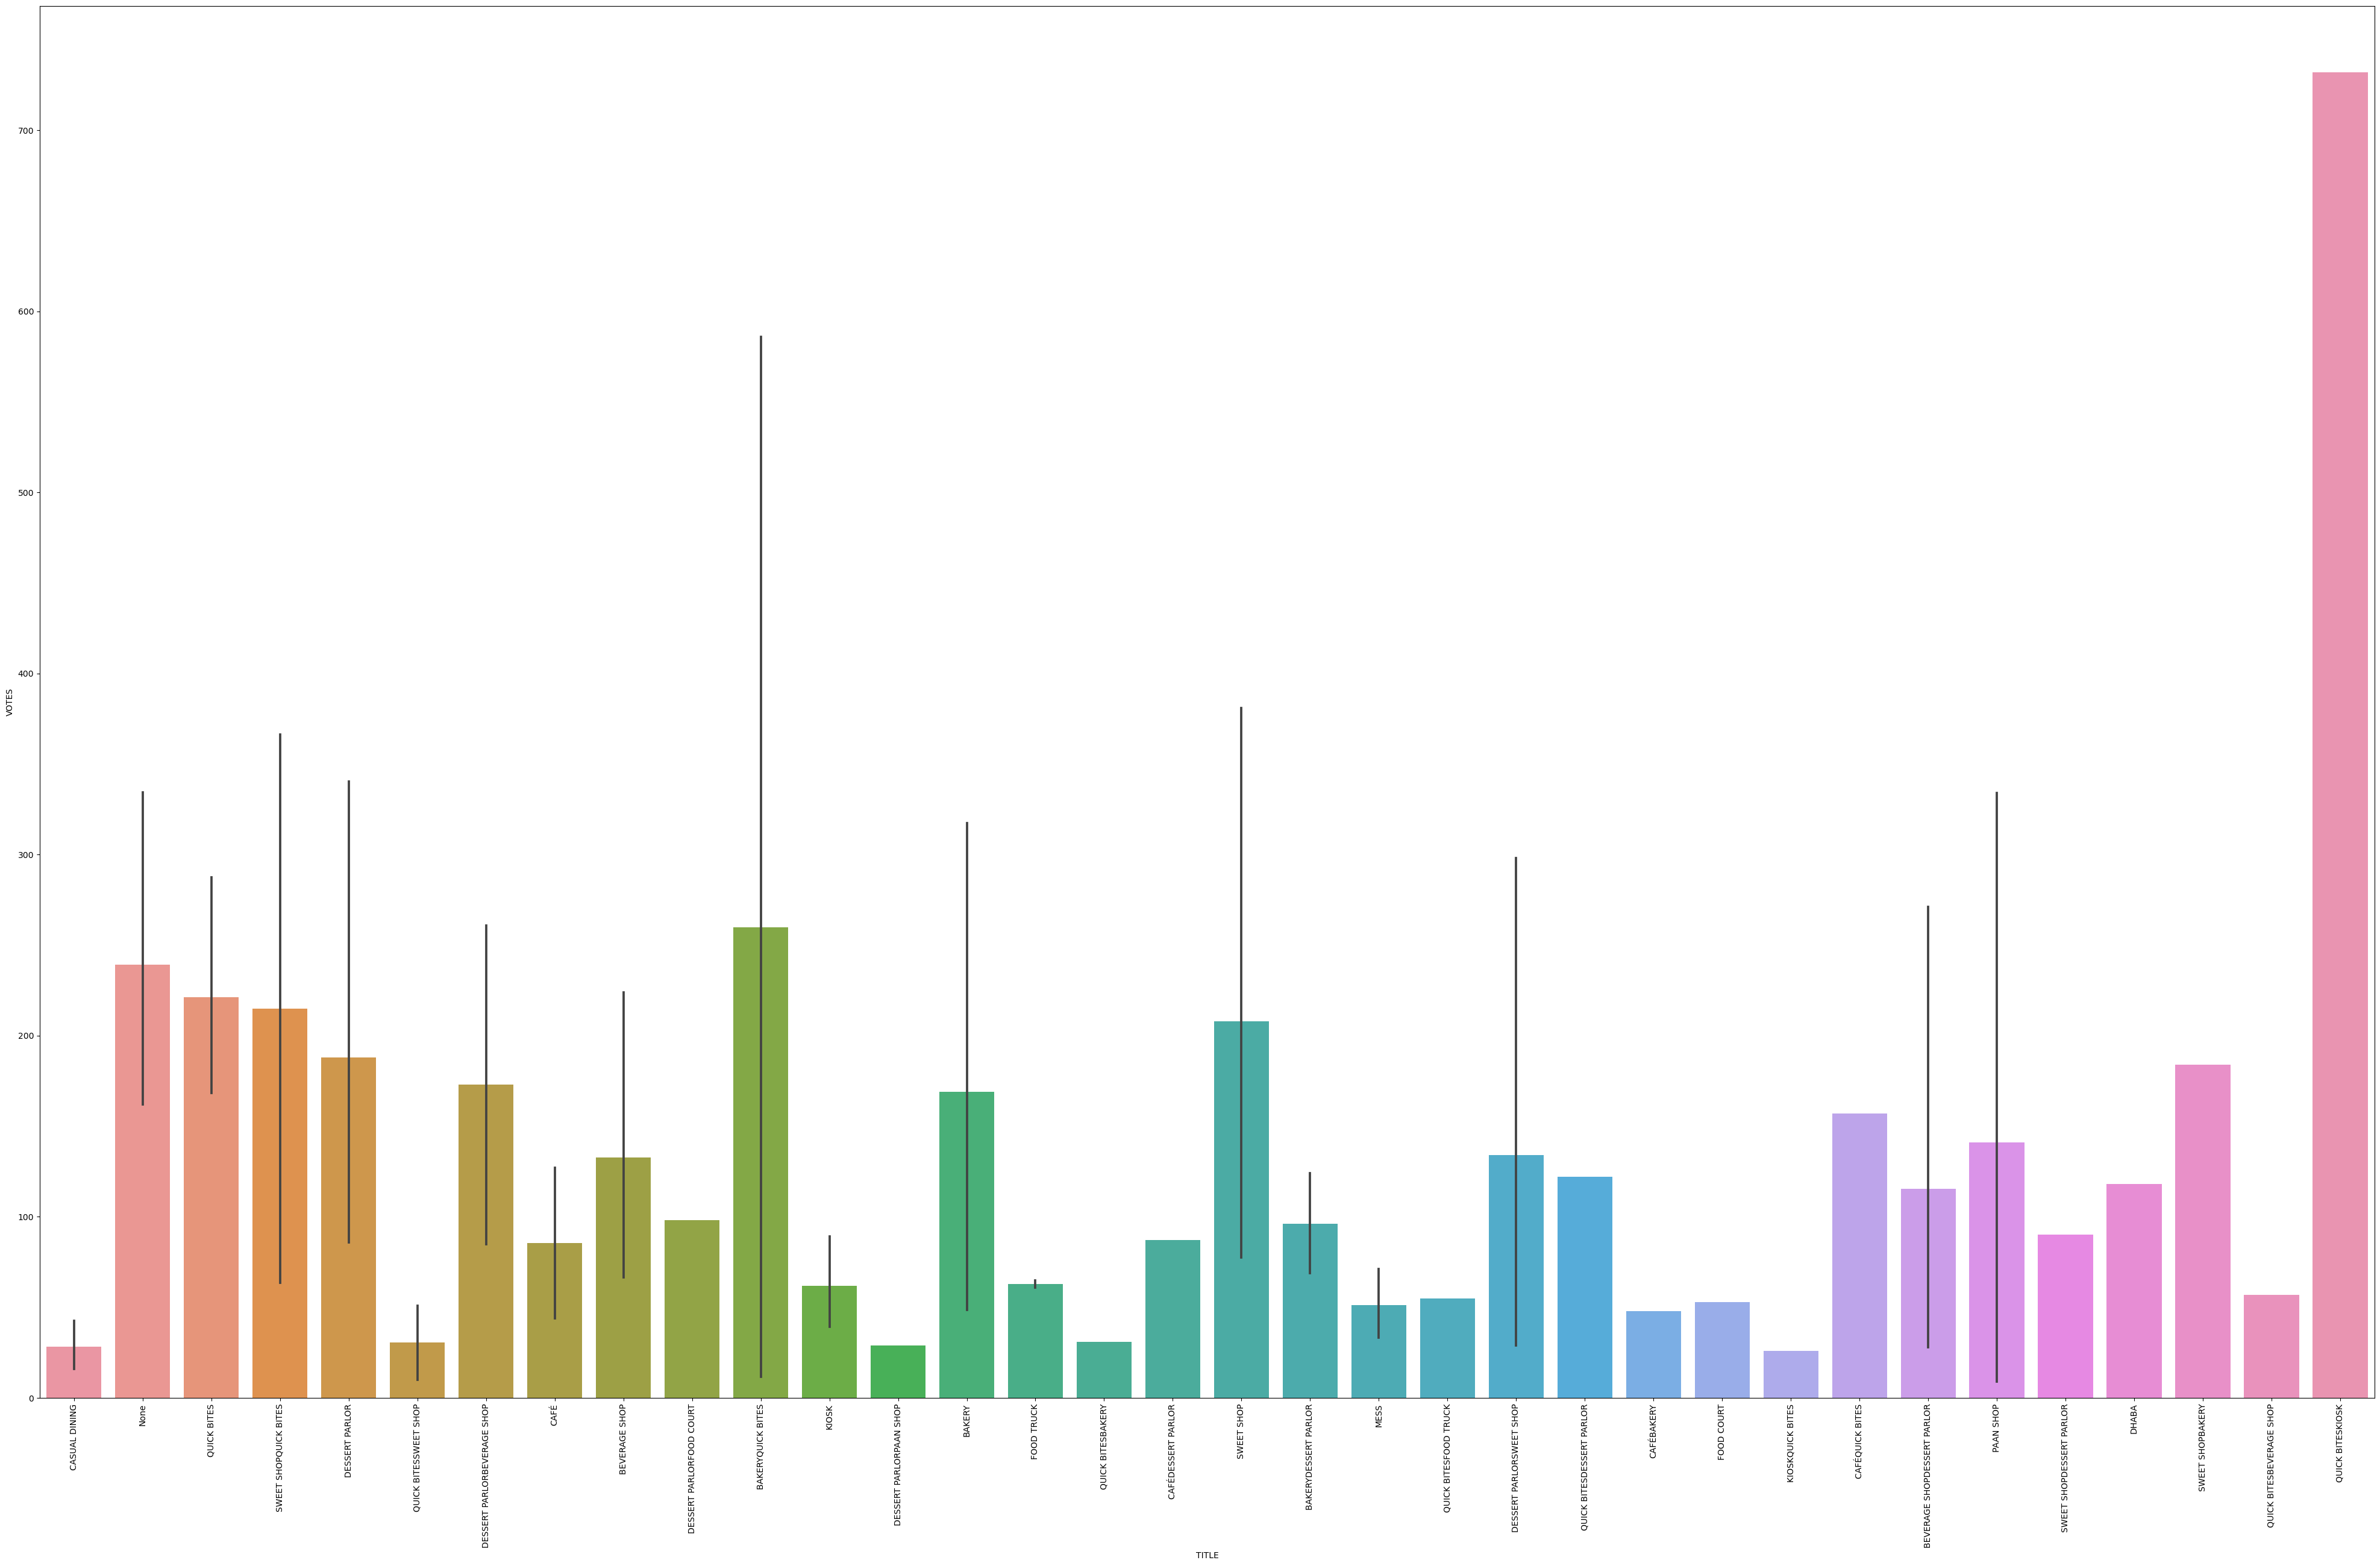

In [44]:
plt.rc("font", size=30)
plt.figure(figsize=(50 , 30))
sns.barplot(data = bottom_500 , x = 'TITLE' , y = 'VOTES' )
plt.xticks(rotation=90)
plt.xticks()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'CASUAL DINING'),
  Text(1, 0, 'None'),
  Text(2, 0, 'QUICK BITES'),
  Text(3, 0, 'SWEET SHOPQUICK BITES'),
  Text(4, 0, 'DESSERT PARLOR'),
  Text(5, 0, 'QUICK BITESSWEET SHOP'),
  Text(6, 0, 'DESSERT PARLORBEVERAGE SHOP'),
  Text(7, 0, 'CAFÉ'),
  Text(8, 0, 'BEVERAGE SHOP'),
  Text(9, 0, 'DESSERT PARLORFOOD COURT'),
  Text(10, 0, 'BAKERYQUICK BITES'),
  Text(11, 0, 'KIOSK'),
  Text(12, 0, 'DESSERT PARLORPAAN SHOP'),
  Text(13, 0, 'BAKERY'),
  Text(14, 0, 'FOOD TRUCK'),
  Text(15, 0, 'QUICK BITESBAKERY'),
  Text(16, 0, 'CAFÉDESSERT PARLOR'),
  Text(17, 0, 'SWEET SHOP'),
  Text(18, 0, 'BAKERYDESSERT PARLOR'),
  Text(19, 0, 'MESS'),
  Text(20, 0, 'QUICK BITESFOOD TRUCK'),
  Text(21, 0, 'DESSERT PARLORSWEET SHOP'),
  Text(22, 0, 'QUICK BITESDESSERT PARLOR'),
  Text(23, 0, 'CAFÉBAKERY'),
  Text(24, 0, 'FOOD COURT'),
  Text(25

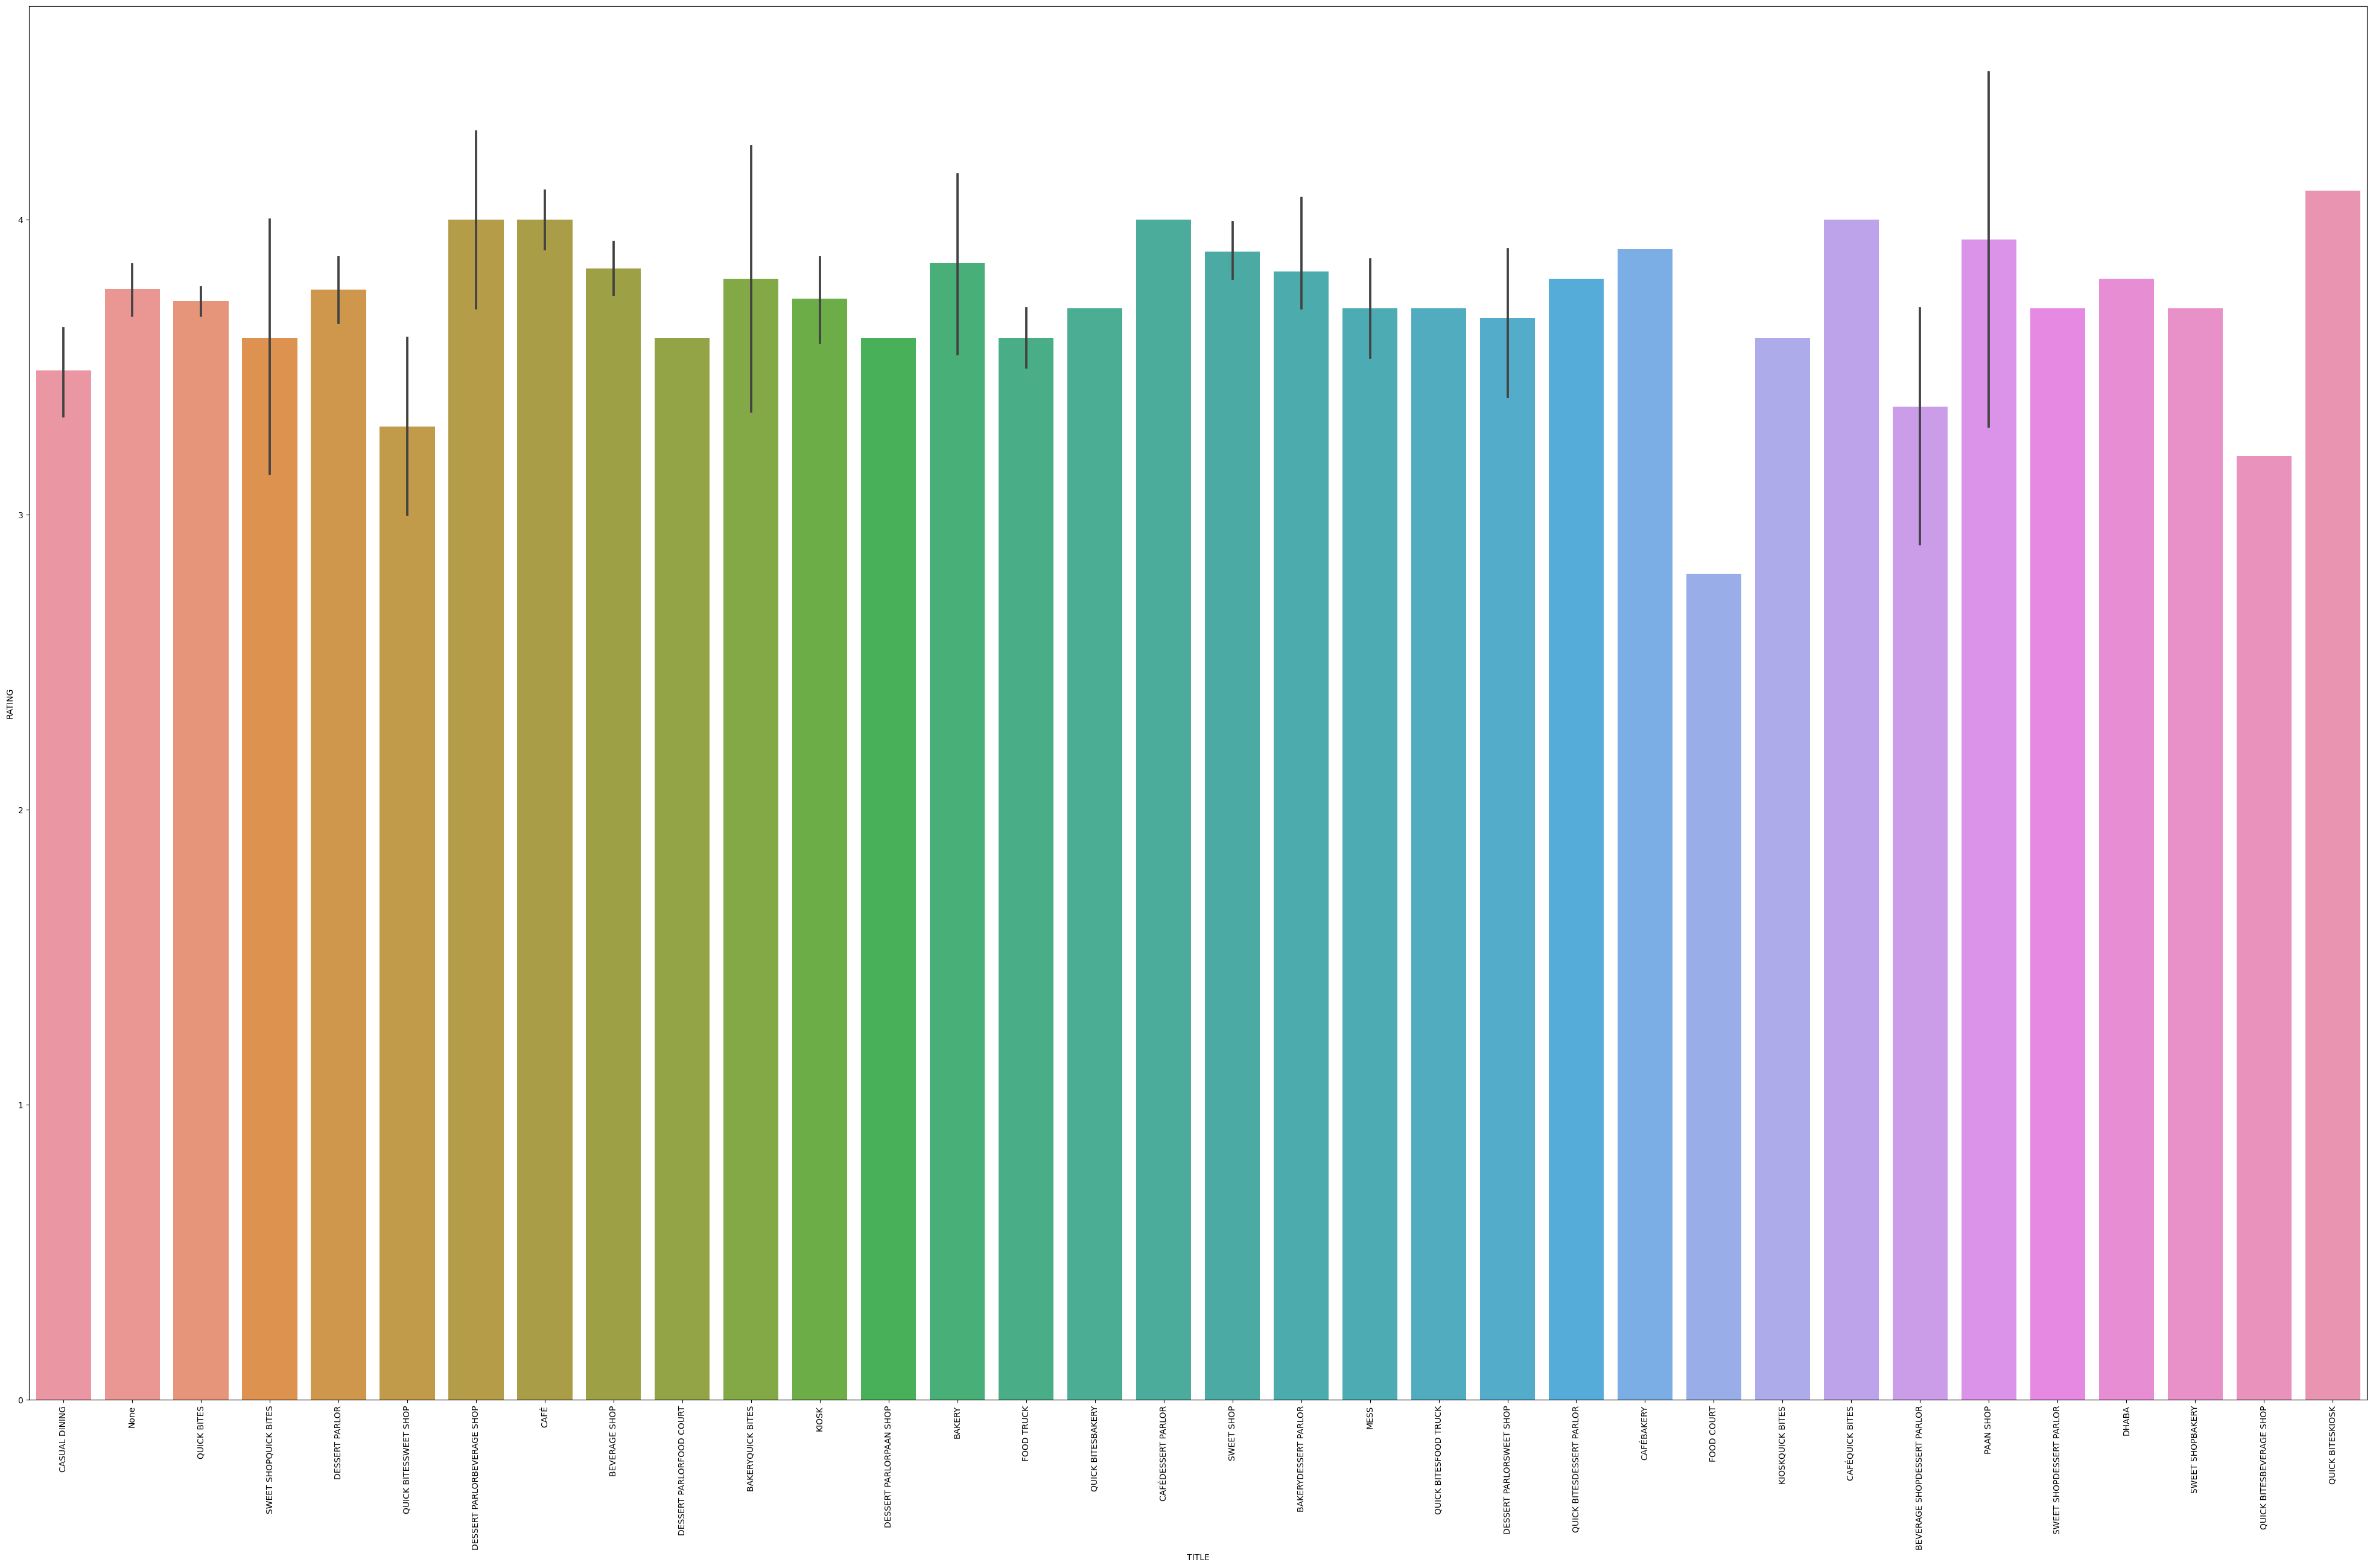

In [45]:
plt.rc("font", size=30)
plt.figure(figsize=(50 , 30))
sns.barplot(data = bottom_500 , x = 'TITLE' , y = 'RATING' )
plt.xticks(rotation=90)
plt.xticks()

In [46]:
# So , Analysing the above dataset of  500 rows with lowest cost , 
# Again I would say that the COST is mostly depend on the Brand of the Resturant and the Cuisines

# Training the dataset :

In [47]:
X = new_df.drop(columns = 'COST')
y = new_df['COST']

In [48]:
X

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49
1,CASUAL DININGBAR,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165
...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546
12686,CASUAL DININGBAR,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32


In [49]:
# I will give the OneHotEncoding to categorical columns :
ohe = OneHotEncoder()
ohe.fit(X[['TITLE', 'CUISINES','TIME', 'CITY', 'LOCALITY']])

OneHotEncoder()

In [50]:
column_trans = make_column_transformer((OneHotEncoder(categories = ohe.categories_),['TITLE', 'CUISINES','TIME', 'CITY', 'LOCALITY']),remainder = 'passthrough')
# So basically this code will transform the given columns when we give the data . categories = ohe.categories_ this code mean , if there is a  column available in X_tet , whch is not present in X_train , then also it will give resukt

In [51]:
# Importing different models :

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

# LinearRegression :

In [53]:
lr_results = []
for i in range(50):
    X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.30 , random_state = i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans , lr)
    pipe.fit(X_train , y_train)
    y_pred = pipe.predict(X_test)
    lr_results.append(r2_score(y_test , y_pred))

In [54]:
print(np.argmax(lr_results))
print(lr_results[np.argmax(lr_results)])

23
0.6505209412947965


In [55]:
X_train_l , X_test_l , y_train_l , y_test_l = train_test_split(X , y, test_size = 0.3 , random_state = 23)

In [56]:
LR = LinearRegression()
pipe = make_pipeline(column_trans , LR)
pipe.fit(X_train_l , y_train_l)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BAKERY', 'BAKERYBEVERAGE SHOP', 'BAKERYCAFÉ',
       'BAKERYCONFECTIONERY', 'BAKERYDESSERT PARLOR', 'BAKERYFOOD COURT',
       'BAKERYQUICK BITES', 'BAKERYSWEET SHOP', 'BAR', 'BARCAFÉ',
       'BARCASUAL DINING', 'BARCLUB', 'BARFINE DINING', 'BARL...
       'khar west', 'kochi', 'navi mumbai', 'opp gurudwara Shakurpur',
       'opp mukteshwar ashram powai', 'p.o Kochi', 'ward X11'],
      dtype=object),
                                                                            array(['(Main Market) Mayur Vihar Phase 2', '1 st Cross street',
       '1-7-172/1 Ecil Opposite', ..., 'rajendra nagar',
       'seawoods grand central mall', 'shop no. 3 Sector 22'],
      dtype=object)]),
                                                  ['TITLE', 'CUISINES', 'TIME',
                                                   'CITY', 'LOCALITY'])])),
                ('linearregression', LinearRegression())])

In [57]:
y_pred_lr = pipe.predict(X_test_l)

In [58]:
r2_score(y_test_l , y_pred_lr)

0.6505209412947965

# SGD Regressor :

In [133]:
sgd_results = []
for i in range(50):
    sgd = SGDRegressor()
    pipe = make_pipeline(column_trans , sgd)
    pipe.fit(X_train , y_train)
    y_pred = pipe.predict(X_test)
    sgd_results.append(r2_score(y_test , y_pred))

In [134]:
print(np.argmax(sgd_results))
print(lr_results[np.argmax(sgd_results)])

38
0.6074234492900075


# KNN :

In [142]:
knn_results = []
for i in range(50):
    knn = KNeighborsRegressor(n_neighbors = 7 , weights = 'distance')
    pipe = make_pipeline(column_trans , knn)
    pipe.fit(X_train , y_train)
    y_pred = pipe.predict(X_test)
    knn_results.append(r2_score(y_test , y_pred))

In [143]:
print(np.argmax(knn_results))
print(lr_results[np.argmax(knn_results)])

0
0.6096620173125777


# Random Forest :

In [147]:
rf_results = []
for i in range(50):
    rf = RandomForestRegressor(n_estimators = 100 , max_depth = 6)
    pipe = make_pipeline(column_trans , rf)
    pipe.fit(X_train , y_train)
    y_pred = pipe.predict(X_test)
    rf_results.append(r2_score(y_test , y_pred))

In [162]:
X_train_r , X_test_r , y_train_r , y_test_r = train_test_split(X , y, test_size = 0.3 , random_state =  )

In [163]:
rf = RandomForestRegressor(n_estimators = 100 , max_depth = 8)
pipe = make_pipeline(column_trans , rf)
pipe.fit(X_train_r , y_train_r)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BAKERY', 'BAKERY,BEVERAGE SHOP', 'BAKERY,CAFÉ',
       'BAKERY,CONFECTIONERY', 'BAKERY,DESSERT PARLOR',
       'BAKERY,FOOD COURT', 'BAKERY,QUICK BITES', 'BAKERY,SWEET SHOP',
       'BAR', 'BAR,CAFÉ', 'BAR,CASUAL DINING', 'BAR,CLUB',
       'BAR,FINE DI...
       'khar west', 'kochi', 'navi mumbai', 'opp gurudwara Shakurpur',
       'opp mukteshwar ashram powai', 'p.o Kochi', 'ward X11'],
      dtype=object),
                                                                            array(['(Main Market) Mayur Vihar Phase 2', '1 st Cross street',
       '1-7-172/1 Ecil Opposite', ..., 'rajendra nagar',
       'seawoods grand central mall', 'shop no. 3 Sector 22'],
      dtype=object)]),
                                                  ['TITLE', 'CUISINES', 'TIME',
                                                   'CITY', 'LOCALITY'])])),
                ('randomforestregressor', RandomForestRegressor(max_depth=10))])

In [164]:
y_pred_rf = pipe.predict(X_test_r)
r2_score(y_test_r , y_pred_rf)

0.6848100279281175

# Gradient Boosting :

In [ ]:
gb_results = []
for i in range(50):
    gb = GradientBoostingRegressor(n_estimators = 100 , max_depth = 1)
    pipe = make_pipeline(column_trans , gb)
    pipe.fit(X_train , y_train)
    y_pred = pipe.predict(X_test)
    gb_results.append(r2_score(y_test , y_pred))

In [181]:
X_train_g , X_test_g , y_train_g , y_test_g = train_test_split(X , y, test_size = 0.3 , random_state =  )

In [182]:
gb = GradientBoostingRegressor(n_estimators = 100 , max_depth = 1)
pipe = make_pipeline(column_trans , gb)
pipe.fit(X_train_g , y_train_g)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['BAKERY', 'BAKERY,BEVERAGE SHOP', 'BAKERY,CAFÉ',
       'BAKERY,CONFECTIONERY', 'BAKERY,DESSERT PARLOR',
       'BAKERY,FOOD COURT', 'BAKERY,QUICK BITES', 'BAKERY,SWEET SHOP',
       'BAR', 'BAR,CAFÉ', 'BAR,CASUAL DINING', 'BAR,CLUB',
       'BAR,FINE DI...
       'khar west', 'kochi', 'navi mumbai', 'opp gurudwara Shakurpur',
       'opp mukteshwar ashram powai', 'p.o Kochi', 'ward X11'],
      dtype=object),
                                                                            array(['(Main Market) Mayur Vihar Phase 2', '1 st Cross street',
       '1-7-172/1 Ecil Opposite', ..., 'rajendra nagar',
       'seawoods grand central mall', 'shop no. 3 Sector 22'],
      dtype=object)]),
                                                  ['TITLE', 'CUISINES', 'TIME',
                                                   'CITY', 'LOCALITY'])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(max_depth=1))])

In [183]:
y_pred_gb = pipe.predict(X_test_g)
r2_score(y_test_g , y_pred_gb)

0.6107704357416213

# Stacking Regressor :

In [59]:
stacking_rgr = StackingRegressor(
   estimators = [
       ('lr', LinearRegression()),
       ('dtr', DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth= 6, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes=16)),
       ('rfr', RandomForestRegressor(n_estimators=100,  criterion='squared_error', max_depth= 5, min_samples_split=2, min_samples_leaf=1, max_leaf_nodes= 16)),
       ('gbr',GradientBoostingRegressor( learning_rate=0.01, n_estimators=500, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,  max_depth=3))
   ],
   final_estimator = LinearRegression(),
   cv = 5
)


In [61]:
pipe = make_pipeline(column_trans , stacking_rgr)
pipe.fit(X_train_l , y_train_l)
stacking_pred = pipe.predict(X_test_l)
accuracy = r2_score(y_test_l, stacking_pred)
print("r2_score of stacking Classifier :", accuracy)

r2_score of stacking Classifier : 0.7053392546645054


In [184]:
# I would go for random Forest Regressor .

In [ ]:
# Actually , I could improve the models but My machine is taking too much of time to  execute a code some  times 15-20 minutes 
# I need to  improve my Machine , I am sorry for that !